In [9]:
import os
import re
import random
import numpy as np
from keras.models import Sequential

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory (
    'CarneDataset/train',
    validation_split=0.2,
    subset='training',
    seed=1,
    image_size=(300,300)
                                                      )

Found 1633 files belonging to 8 classes.
Using 1307 files for training.


In [11]:
class_names = train_ds.class_names
print(class_names)

['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


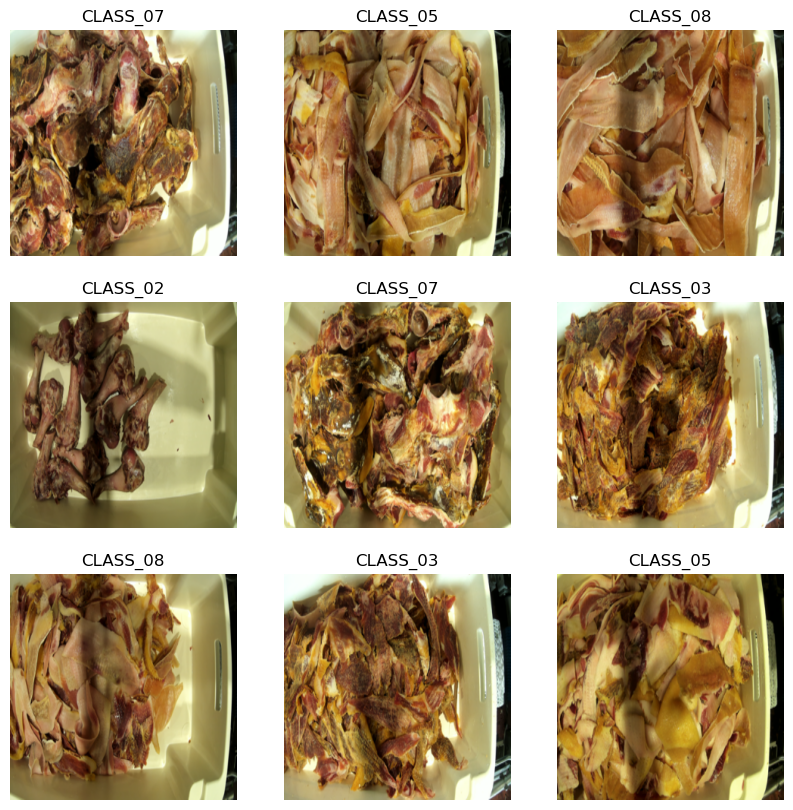

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [14]:
num_classes = len(class_names)

model = tf.keras. Sequential ([
tf.keras.layers.Rescaling(1./255, input_shape=(300, 300, 3)), tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'), tf.keras.layers. MaxPooling2D(),
tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'), tf.keras.layers.MaxPooling2D(),
tf.keras. layers.Conv2D(64, 3, padding='same', activation='relu'), tf.keras.layers.MaxPooling2D (),
tf.keras.layers.Flatten(), tf.keras.layers. Dropout(0.2), tf.keras.layers.Dense(128, activation='relu'), tf.keras.layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
loss=tf.keras. losses. SparseCategoricalCrossentropy (from_logits=True), metrics=['accuracy'])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1